# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [61]:
cities


['sinnamary',
 'tuatapere',
 'anadyr',
 'upernavik',
 'manzhouli',
 'jamestown',
 'los llanos de aridane',
 'ilulissat',
 'ribeira grande',
 'bathsheba',
 'mount isa',
 'manzil jamil',
 'grand river south east',
 'mataura',
 'dikson',
 'racine',
 'cap malheureux',
 'katsuura',
 'kapaa',
 'cabo san lucas',
 'tumannyy',
 'hobart',
 'hithadhoo',
 'yulara',
 'belushya guba',
 'guerrero negro',
 'nisia floresta',
 'beringovskiy',
 'rolim de moura',
 'salym',
 'rikitea',
 'alpinopolis',
 'iqaluit',
 'svetlogorsk',
 'lom sak',
 'hermanus',
 'bluff',
 'ushuaia',
 'yusva',
 'avarua',
 'sulangan',
 'nouadhibou',
 'hualmay',
 'illoqqortoormiut',
 'hilo',
 'oum hadjer',
 'busselton',
 'aykhal',
 'port alfred',
 'leningradskiy',
 'barrow',
 'nova vicosa',
 'nhulunbuy',
 'warri',
 'flinders',
 'codrington',
 'okhtyrka',
 'orillia',
 'porto torres',
 'kjollefjord',
 'narsaq',
 'esperance',
 'malwan',
 'baturaja',
 'ust-ordynskiy',
 'watertown',
 'sitka',
 'albany',
 'nueva loja',
 'durusu',
 'urucara

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
     

In [63]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloud_cover = []
city_list = []
country = []
date = []
citycount = 0
for city in cities:
    citycount = citycount +1
    response = requests.get(f"{query_url}&q={city}").json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud_cover.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        print(f" Processing {citycount} , {city}")
    except KeyError:
        print (f"The city {city} was not found.")
  


 Processing 1 , sinnamary
 Processing 2 , tuatapere
 Processing 3 , anadyr
 Processing 4 , upernavik
 Processing 5 , manzhouli
 Processing 6 , jamestown
 Processing 7 , los llanos de aridane
 Processing 8 , ilulissat
 Processing 9 , ribeira grande
 Processing 10 , bathsheba
 Processing 11 , mount isa
The city manzil jamil was not found.
The city grand river south east was not found.
 Processing 14 , mataura
 Processing 15 , dikson
 Processing 16 , racine
 Processing 17 , cap malheureux
 Processing 18 , katsuura
 Processing 19 , kapaa
 Processing 20 , cabo san lucas
The city tumannyy was not found.
 Processing 22 , hobart
 Processing 23 , hithadhoo
 Processing 24 , yulara
The city belushya guba was not found.
 Processing 26 , guerrero negro
 Processing 27 , nisia floresta
 Processing 28 , beringovskiy
The city rolim de moura was not found.
 Processing 30 , salym
 Processing 31 , rikitea
 Processing 32 , alpinopolis
 Processing 33 , iqaluit
 Processing 34 , svetlogorsk
 Processing 35 , l

 Processing 295 , yar-sale
 Processing 296 , benguela
 Processing 297 , klaksvik
 Processing 298 , salinas
The city macaboboni was not found.
 Processing 300 , oussouye
 Processing 301 , san rafael
 Processing 302 , tara
 Processing 303 , forbes
 Processing 304 , kidal
 Processing 305 , mahanoro
 Processing 306 , sur
 Processing 307 , karratha
 Processing 308 , lebu
 Processing 309 , mujiayingzi
 Processing 310 , chuy
 Processing 311 , sisimiut
 Processing 312 , belmonte
 Processing 313 , mitu
 Processing 314 , la ligua
 Processing 315 , zapolyarnyy
 Processing 316 , lerwick
The city palabuhanratu was not found.
 Processing 318 , mahibadhoo
 Processing 319 , ponta do sol
 Processing 320 , port hardy
 Processing 321 , ancud
 Processing 322 , juba
 Processing 323 , northam
 Processing 324 , jawhar
 Processing 325 , cognac
 Processing 326 , kamenka
 Processing 327 , ambilobe
The city vaitupu was not found.
 Processing 329 , madison heights
 Processing 330 , svetlyy yar
 Processing 331 , n

The city samusu was not found.
The city alotau was not found.
 Processing 592 , tual
 Processing 593 , meulaboh
 Processing 594 , acajutla
 Processing 595 , bereda
 Processing 596 , san javier
 Processing 597 , zhanaozen
 Processing 598 , kaka
 Processing 599 , marzuq
 Processing 600 , maniitsoq
 Processing 601 , pahrump
 Processing 602 , rawson
 Processing 603 , pafos
 Processing 604 , wasilla
 Processing 605 , ketchikan
 Processing 606 , deputatskiy
 Processing 607 , kikugawa
 Processing 608 , sergeyevka
 Processing 609 , pochutla
 Processing 610 , kerema
The city neos pirgos was not found.
 Processing 612 , tessalit
 Processing 613 , quang ngai
 Processing 614 , vertientes
 Processing 615 , montepuez
 Processing 616 , isangel
 Processing 617 , paamiut
 Processing 618 , nyurba
The city tabukiniberu was not found.
 Processing 620 , clemmons
 Processing 621 , schweinfurt
 Processing 622 , bilibino
 Processing 623 , chantada
 Processing 624 , mastic beach
 Processing 625 , bodden town
T

In [64]:
#print(lat)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
weather_dict = {
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humidity,
    "wind_speed":wind_speed,
    "cloud_cover":cloud_cover,
    "city_list":city_list,
    "country":country,
    "date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

lat     lng   temp  humidity  wind_speed  cloud_cover  city_list country  \
0   5.38  -52.95  82.17        73       12.06           88  sinnamary      GF   
1 -46.13  167.68  51.39        87        7.27           92  tuatapere      NZ   
2  64.75  177.48  28.17        86        8.95           90     anadyr      RU   
3  72.79  -56.15  19.60        91        7.72           80  upernavik      GL   
4  49.60  117.43  44.55        55       10.83            0  manzhouli      CN   

         date  
0  1588875271  
1  1588875271  
2  1588875272  
3  1588875272  
4  1588875272

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
#  Get the indices of cities that have humidity over 100%.
  # None exist in the .describe
idx100 = weather_data[weather_data['humidity'] > 100].index
cleaned_weather_data = weather_data.drop(idx100, inplace=False)
cleaned_weather_data.head()

lat     lng   temp  humidity  wind_speed  cloud_cover  city_list country  \
0   5.38  -52.95  82.17        73       12.06           88  sinnamary      GF   
1 -46.13  167.68  51.39        87        7.27           92  tuatapere      NZ   
2  64.75  177.48  28.17        86        8.95           90     anadyr      RU   
3  72.79  -56.15  19.60        91        7.72           80  upernavik      GL   
4  49.60  117.43  44.55        55       10.83            0  manzhouli      CN   

         date  
0  1588875271  
1  1588875271  
2  1588875272  
3  1588875272  
4  1588875272

In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# See above.

In [68]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

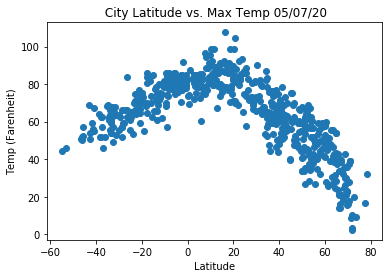

In [69]:
# Scatter Plot City Latitude vs Max Temp
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["temp"], marker = "o")
plt.title(f' City Latitude vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temp (Farenheit)")
plt.xlabel("Latitude")
plt.savefig('output/City Latitude vs. Max Temperature.png')        
# The closer to the equator 0 degrees lat, the higher the temps, decending on either side of the midline.

## Latitude vs. Humidity Plot

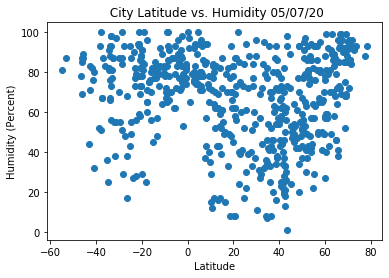

In [70]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["humidity"], marker = "o")
plt.title(f' City Latitude vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
plt.savefig('output/City Latitude vs. Humidity.png') 

## Latitude vs. Cloudiness Plot

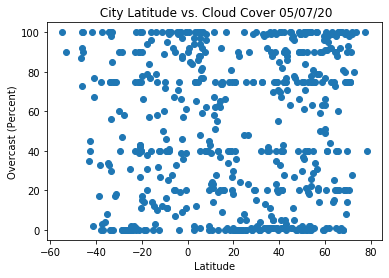

In [71]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["cloud_cover"], marker = "o")
plt.title(f' City Latitude vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
plt.savefig('output/City Latitude vs. Cloud Cover.png')           

## Latitude vs. Wind Speed Plot

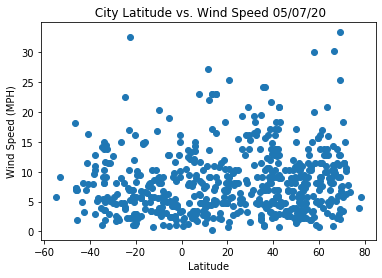

In [72]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["wind_speed"], marker = "o")
plt.title(f' City Latitude vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.savefig('output/City Latitude vs. Wind Speed.png')           

## Linear Regression

In [73]:
# OPTIONAL: Create a function to create Linear Regression plots

In [74]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.copy()
northern_df = north_df[north_df["lat"] > 0]
northern_df

lat     lng   temp  humidity  wind_speed  cloud_cover     city_list  \
0     5.38  -52.95  82.17        73       12.06           88     sinnamary   
2    64.75  177.48  28.17        86        8.95           90        anadyr   
3    72.79  -56.15  19.60        91        7.72           80     upernavik   
4    49.60  117.43  44.55        55       10.83            0     manzhouli   
5    42.10  -79.24  54.86        37       17.22           75     jamestown   
..     ...     ...    ...       ...         ...          ...           ...   
584  42.61  -83.15  62.46        33       20.80           75          troy   
585  15.13  -23.22  78.80        61       23.04           75  vila do maio   
587  21.12   70.12  81.32        87        8.16            0       mangrol   
588  50.13 -101.67  45.30        51        8.99            2      moosomin   
589  19.38  -69.85  89.60        66        4.70           75         nagua   

    country        date  
0        GF  1588875271  
2        RU  1588875272  
3        GL  1588875272  
4        CN  1588875272  
5        US  1588875008  
..      ...         ...  
584      US  1588875434  
585      CV  1588875434  
587      IN  1588875434  
588      CA  1588875434  
589      DO  1588875435  

[414 rows x 9 columns]

In [75]:
# Create Northern and Southern Hemisphere DataFrames
south_df = weather_data.copy()
southern_df = south_df[south_df["lat"] < 0]
southern_df

lat     lng   temp  humidity  wind_speed  cloud_cover       city_list  \
1   -46.13  167.68  51.39        87        7.27           92       tuatapere   
10  -20.73  139.50  59.00        58       11.92           27       mount isa   
11  -46.19  168.86  50.29        85        7.29          100         mataura   
14  -19.98   57.61  75.00        91        3.00           17  cap malheureux   
18  -42.88  147.33  53.98        71        8.05           40          hobart   
..     ...     ...    ...       ...         ...          ...             ...   
567 -19.55  169.27  72.91        81       10.20           66         isangel   
580  -2.65   10.00  80.01        87        5.41           87           gamba   
581 -31.39  -52.68  63.73        55       11.41           75         cangucu   
583  -2.97  119.90  70.20        91        2.42          100        rantepao   
586 -16.70 -151.02  82.08        75       14.58           57            fare   

    country        date  
1        NZ  1588875271  
10       AU  1588875274  
11       NZ  1588875274  
14       MU  1588875275  
18       AU  1588875134  
..      ...         ...  
567      VU  1588875429  
580      GA  1588875433  
581      BR  1588875433  
583      ID  1588875433  
586      PF  1588875434  

[176 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

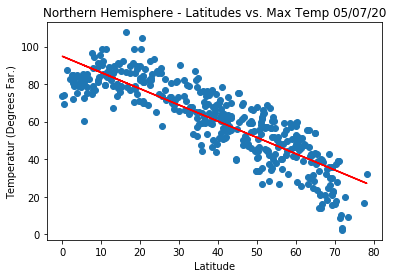

In [76]:
plt.scatter(northern_df["lat"], northern_df["temp"], marker = "o")
plt.title(f'Northern Hemisphere - Latitudes vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temperatur (Degrees Far.)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["temp"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")
plt.savefig('output/Northern Latitudes vs. Max Temp.png')              
          ## The further north you go, the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

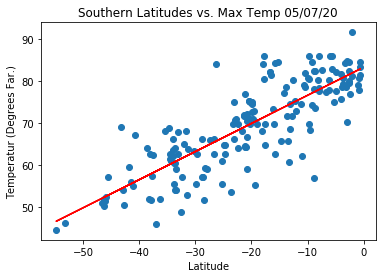

In [77]:
plt.scatter(southern_df["lat"], southern_df["temp"], marker = "o")
plt.title(f'Southern Latitudes vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temperatur (Degrees Far.)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["temp"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")  
plt.savefig('output/Southern Latitudes vs. Max Temp.png')            
          # Further south it get's very cold, closer to the equator (0), the warmer it is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

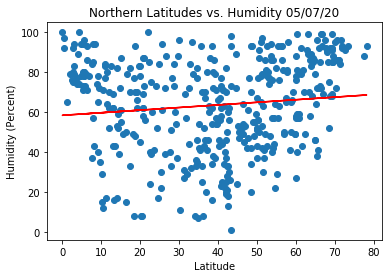

In [78]:
plt.scatter(northern_df["lat"], northern_df["humidity"], marker = "o")
plt.title(f'Northern Latitudes vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["humidity"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")  
plt.savefig('output/Northern Latitudes vs. Humidity.png')               
          # Mid latitudes are humid as they are impacted with lots of moisture.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

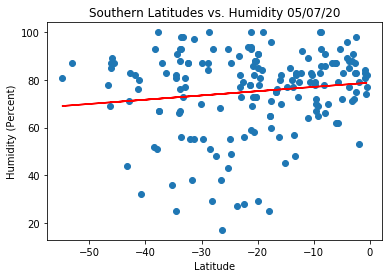

In [79]:
plt.scatter(southern_df["lat"], southern_df["humidity"], marker = "o")
plt.title(f'Southern Latitudes vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["humidity"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")  
plt.savefig('output/Southern Latitudes vs. Humidity.png')           
          # Mid latitudes are humid as they are impacted with lots of moisture.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

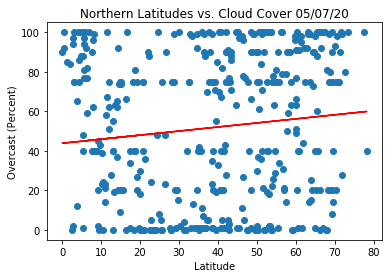

In [80]:
plt.scatter(northern_df["lat"], northern_df["cloud_cover"], marker = "o")
plt.title(f'Northern Latitudes vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["cloud_cover"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")   
plt.savefig('output/Northern Latitudes vs. Cloud Cover.png')  
          # Scatterd clouds today,,,Just like the northwest.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

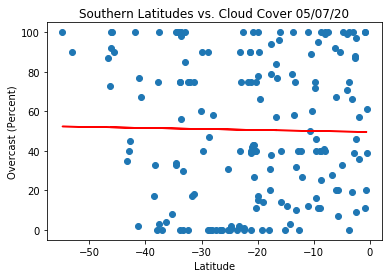

In [81]:
plt.scatter(southern_df["lat"], southern_df["cloud_cover"], marker = "o")
plt.title(f'Southern Latitudes vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["cloud_cover"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red") 
plt.savefig('output/Southern Latitudes vs. Cloud Cover.png')          
          # note the lack of cloud cover frequency in the lower latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

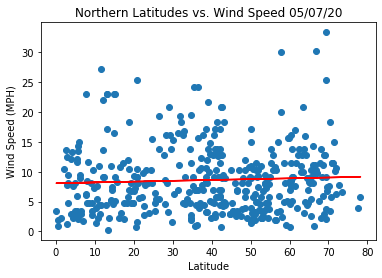

In [82]:
plt.scatter(northern_df["lat"], northern_df["wind_speed"], marker = "o")
plt.title(f'Northern Latitudes vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["wind_speed"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")    
plt.savefig('output/Northern Latitudes vs. Wind Speed.png')           
          # a seemngly linear activity with a few upshots of wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

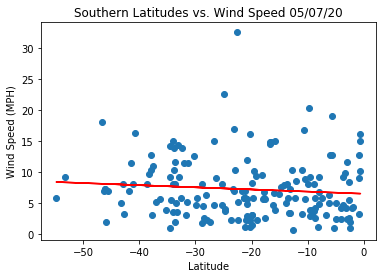

In [83]:
plt.scatter(southern_df["lat"], southern_df["wind_speed"], marker = "o")
plt.title(f'Southern Latitudes vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["wind_speed"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")   
plt.savefig('output/Southern Latitudes vs. Wind Speed.png')             
          # Not real windy in the southern latitudes.

In [84]:
weather_data.to_csv(output_data_file, index = False)